In [4]:
import pandas as pd
df = pd.read_csv("../data/train.csv")

In [10]:
df.iloc[0,3]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [22]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
# from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
#     # remove stop words
#     stop = stopwords.words('english')
#     text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df["text_clean"] = df["text"].apply(lambda x: clean_text(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jwr19\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jwr19\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
df[["text","text_clean"]].head(40)

,text,text_clean
0,Our Deeds are the Reason of this #earthquake M...,our deed be the reason of this earthquake may ...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all resident ask to shelter in place be be not...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order in ca...
4,Just got sent this photo from Ruby #Alaska as ...,just get send this photo from ruby alaska smok...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy close in both ...
6,#flood #disaster Heavy rain causes flash flood...,flood disaster heavy rain cause flash flooding...
7,I'm on top of the hill and I can see a fire in...,i'm on top of the hill and can see fire in the...
8,There's an emergency evacuation happening now ...,there's an emergency evacuation happen now in ...
9,I'm afraid that the tornado is coming to our a...,i'm afraid that the tornado be come to our area


In [27]:
# add sentiment anaylsis columns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["text_clean"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jwr19\AppData\Roaming\nltk_data...


In [30]:
df.head()

,id,keyword,location,text,target,text_clean,neg,neu,pos,compound
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deed be the reason of this earthquake may ...,0.000,0.840,0.16,0.2732
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,0.286,0.714,0.00,-0.3400
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all resident ask to shelter in place be be not...,0.095,0.905,0.00,-0.2960
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order in ca...,0.000,1.000,0.00,0.0000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just get send this photo from ruby alaska smok...,0.000,1.000,0.00,0.0000


In [33]:
# create doc2vec vector columns
import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["text_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["text_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [36]:
df.keys()

Index(['id', 'keyword', 'location', 'text', 'target', 'text_clean', 'neg',
       'neu', 'pos', 'compound', 'doc2vec_vector_0', 'doc2vec_vector_1',
       'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4'],
      dtype='object')

In [39]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["text_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

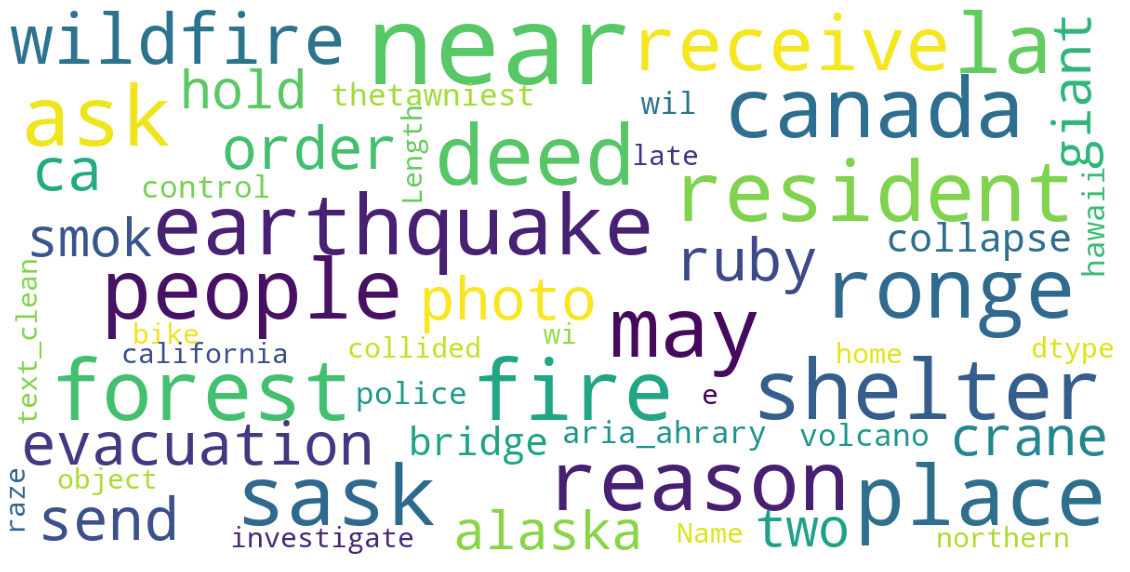

In [62]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 500,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["text_clean"])

In [69]:
# highest positive sentiment reviews (with more than 5 words)
df.sort_values("pos", ascending = False)[["text", "pos"]].head(10)

,text,pos
6140,Super sweet and beautiful :) https://t.co/TUi9...,0.915
4758,@Benji_Devos thanks thanks :3,0.853
6780,Don't forget tragedy ?????????????? https://t....,0.838
16,I love fruits,0.808
22,Love skiing,0.808
433,@local_arsonist LMFAO,0.778
645,@Shayoly yes I love it,0.775
307,ouvindo Peace Love &amp; Armageddon,0.720
694,@omgbethersss @BethanyMota haha love this??,0.706
276,Apocalypse please,0.697
